In [495]:
# master.csv
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score

from sklearn.externals.six import StringIO   
from IPython.display import display, Image
from sklearn.tree import export_graphviz

In [496]:
df = pd.read_csv("master.csv").dropna()
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
72,Albania,1995,male,25-34 years,13,232900,5.58,Albania1995,0.619,"2,424,499,009",835,Generation X
73,Albania,1995,male,55-74 years,9,178000,5.06,Albania1995,0.619,"2,424,499,009",835,Silent
74,Albania,1995,female,75+ years,2,40800,4.90,Albania1995,0.619,"2,424,499,009",835,G.I. Generation
75,Albania,1995,female,15-24 years,13,283500,4.59,Albania1995,0.619,"2,424,499,009",835,Generation X
76,Albania,1995,male,15-24 years,11,241200,4.56,Albania1995,0.619,"2,424,499,009",835,Generation X


In [498]:
df_cat =df[["sex","age","population","gdp_per_capita ($)","HDI for year","suicides/100k pop"]]
df_cat.loc[df['suicides/100k pop'] >=10 ,"suicides/100k pop"] = None
df_cat=df_cat.dropna()

In [499]:
df_cat.head()


,sex,age,population,gdp_per_capita ($),HDI for year,suicides/100k pop
72,male,25-34 years,232900,835,0.619,5.58
73,male,55-74 years,178000,835,0.619,5.06
74,female,75+ years,40800,835,0.619,4.90
75,female,15-24 years,283500,835,0.619,4.59
76,male,15-24 years,241200,835,0.619,4.56


(array([2047.,  599.,  478.,  436.,  374.,  322.,  318.,  285.,  255.,
         219.]),
 array([0.   , 0.997, 1.994, 2.991, 3.988, 4.985, 5.982, 6.979, 7.976,
        8.973, 9.97 ]),
 <a list of 10 Patch objects>)

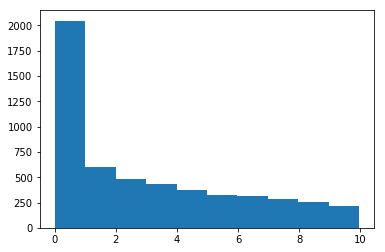

In [500]:
plt.hist(df_cat["suicides/100k pop"], bins=10)

In [501]:
df_cat.loc[df['age'] == '5-14 years', 'age'] = 0
df_cat.loc[df['age'] == '15-24 years', 'age'] = 1
df_cat.loc[df['age'] == '25-34 years', 'age'] = 2
df_cat.loc[df['age'] == '35-54 years', 'age'] = 3
df_cat.loc[df['age'] == '55-74 years', 'age'] = 4
df_cat.loc[df['age'] == '75+ years', 'age'] = 5

df_cat.loc[df['sex'] == 'male', 'sex'] = 0   
df_cat.loc[df['sex'] == 'female', 'sex'] = 1

df_cat.loc[ df['suicides/100k pop'] <.01 , "suicides/100k pop"] = 0   
df_cat.loc[(df['suicides/100k pop'] >= .01) & (df['suicides/100k pop'] <.1 ) , "suicides/100k pop"] = 1 
df_cat.loc[(df['suicides/100k pop'] >= .1) & (df['suicides/100k pop'] <.5 ) , "suicides/100k pop"] = 2
df_cat.loc[(df['suicides/100k pop'] >= .5) & (df['suicides/100k pop'] <1 ) , "suicides/100k pop"] = 3
df_cat.loc[(df['suicides/100k pop'] >= 1) & (df['suicides/100k pop'] <4 ) , "suicides/100k pop"] = 4
df_cat.loc[(df['suicides/100k pop'] >= 4) & (df['suicides/100k pop'] <6 ) , "suicides/100k pop"] = 5
df_cat.loc[(df['suicides/100k pop'] >= 6) & (df['suicides/100k pop'] <7 ) , "suicides/100k pop"] = 6
df_cat.loc[df['suicides/100k pop'] >7  , "suicides/100k pop"] = 7


In [502]:
df_cat.loc[df['generation'] == 'Silent', 'generation'] =0
df_cat.loc[df['generation'] == 'Millenials', 'generation'] =1
df_cat.loc[df['generation'] == 'Generation Z', 'generation'] = 2
df_cat.loc[df['generation'] == 'Generation X', 'generation'] = 3
df_cat.loc[df['generation'] == 'G.I. Generation', 'generation'] = 4
df_cat.loc[df['generation'] == 'Boomers', 'generation'] = 5


(array([1157.,   26.,  470.,    0.,  394., 1517.,    0.,  696.,  320.,
         753.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

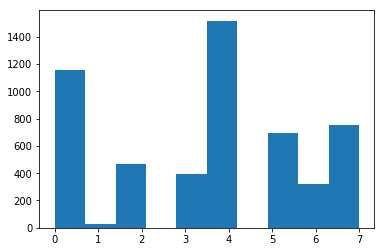

In [503]:
df_cat.count()

plt.hist(df_cat["suicides/100k pop"], bins=10)

In [504]:
X = df_cat.iloc[:,:-1]
y = df_cat.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=12 )

In [505]:
y_train.head()

20863    3.0
16132    2.0
26808    0.0
12545    3.0
25500    3.0
Name: generation, dtype: float64

In [506]:
df_cat["suicides/100k pop"].unique()

array([5., 4., 3., 7., 2., 0., 6., 1.])

In [507]:
logReg = LogisticRegression(solver = 'saga',multi_class='auto',max_iter=10000) # for logistic regression

In [508]:
logReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=10000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=None, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [509]:
y_pred = logReg.predict(X_test)
print(y_pred)

[1. 1. 1. ... 3. 1. 1.]


array([1., 1., 1., ..., 3., 1., 1.])

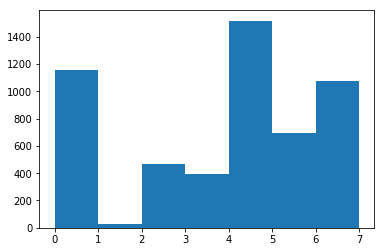

In [510]:
plt.hist(df_cat["suicides/100k pop"], bins=7)

y_pred

In [511]:
accuracy_score(y_test, y_pred) 

0.2755388940955951

In [523]:
# accuracy_score(y_test,np.zeros(len(y_test)))

In [513]:
y_test.unique()

array([0., 3., 1., 5., 2., 4.])

In [514]:
confusion_matrix(y_test, y_pred)

array([[  0, 147,   0,  18,   0,   0],
       [  0, 235,   0,  64,   0,   0],
       [  0, 137,   0,  24,   0,   0],
       [  0, 196,   0,  59,   0,   0],
       [  0,  47,   0,   7,   0,   0],
       [  0,  94,   0,  39,   0,   0]], dtype=int64)

In [524]:
m_dict = {
    "lr" : LogisticRegression(solver ="saga",multi_class="auto",max_iter=10000),
     "svm": SVC(gamma="scale"),
      "dt": DecisionTreeClassifier() ,
      "rf":RandomForestClassifier(n_estimators=7) ,
     "knn": KNeighborsClassifier(n_neighbors=7)
}

In [525]:
# for i in range(1,11):
#     knn=KNeighborsClassifier(n_neighbors=i)
#     model.fit(X_train, y_train)
#     print(accuracy_score(y_test, y_pred)) 
    

In [526]:
y_pred_dct = {}

for key, model in m_dict.items():
  
  model.fit(X_train, y_train)
  
  y_pred_dct[key] = model.predict(X_test)

In [527]:
for key, y_pred in y_pred_dct.items():
    print ( key,  accuracy_score(y_test, y_pred) )

lr 0.2755388940955951
svm 0.2858481724461106
dt 0.7788191190253045
rf 0.7141518275538894
knn 0.4076850984067479


In [193]:
for key, y_pred in y_pred_dct.items():
    print ( key )
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

lr
[[805   0   0   0   0   0]
 [280   0   0   0   0   0]
 [168   0   0   0   0   0]
 [108   0   0   0   0   0]
 [ 81   0   0   0   0   0]
 [ 52   0   0   0   0   0]]
svm
[[804   0   1   0   0   0]
 [279   1   0   0   0   0]
 [168   0   0   0   0   0]
 [108   0   0   0   0   0]
 [ 81   0   0   0   0   0]
 [ 50   2   0   0   0   0]]
dt
[[667  85  21  19   6   7]
 [ 75 127  48  19   6   5]
 [ 40  34  60  23   6   5]
 [ 14  12  37  26  13   6]
 [  7  17   4  17  25  11]
 [  7   9   7   7  11  11]]
rf
[[709  60  19   9   3   5]
 [ 95 127  40  10   7   1]
 [ 44  38  60  23   1   2]
 [ 17  17  31  23  15   5]
 [ 11  13   5  16  26  10]
 [  8   5   7   7  10  15]]
knn
[[687  74  28   7   7   2]
 [191  51  20   4   7   7]
 [129  17  14   5   2   1]
 [ 65  19   8  11   4   1]
 [ 60  14   3   1   3   0]
 [ 35  12   2   2   0   1]]
